In [2]:
pip install opencv-python opencv-contrib-python

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 67.0 MB 12.0 MB/s eta 0:00:01     |██████                          | 12.7 MB 34.9 MB/s eta 0:00:02     |█████████████████▋              | 36.9 MB 47.5 MB/s eta 0:00:01
     |████████████████████████████████| 73.2 MB 18.3 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


BSE图像尺寸：(768, 1024)
✓ Si 元素面谱降噪完成，保存至：filtered_elements/Si_Filter.jpg
✓ Al 元素面谱降噪完成，保存至：filtered_elements/Al_Filter.jpg
✓ Ca 元素面谱降噪完成，保存至：filtered_elements/Ca_Filter.jpg
✓ Na 元素面谱降噪完成，保存至：filtered_elements/Na_Filter.jpg
✓ Mg 元素面谱降噪完成，保存至：filtered_elements/Mg_Filter.jpg
✓ Fe 元素面谱降噪完成，保存至：filtered_elements/Fe_Filter.jpg

所有元素面谱降噪处理完成！结果保存在文件夹：filtered_elements


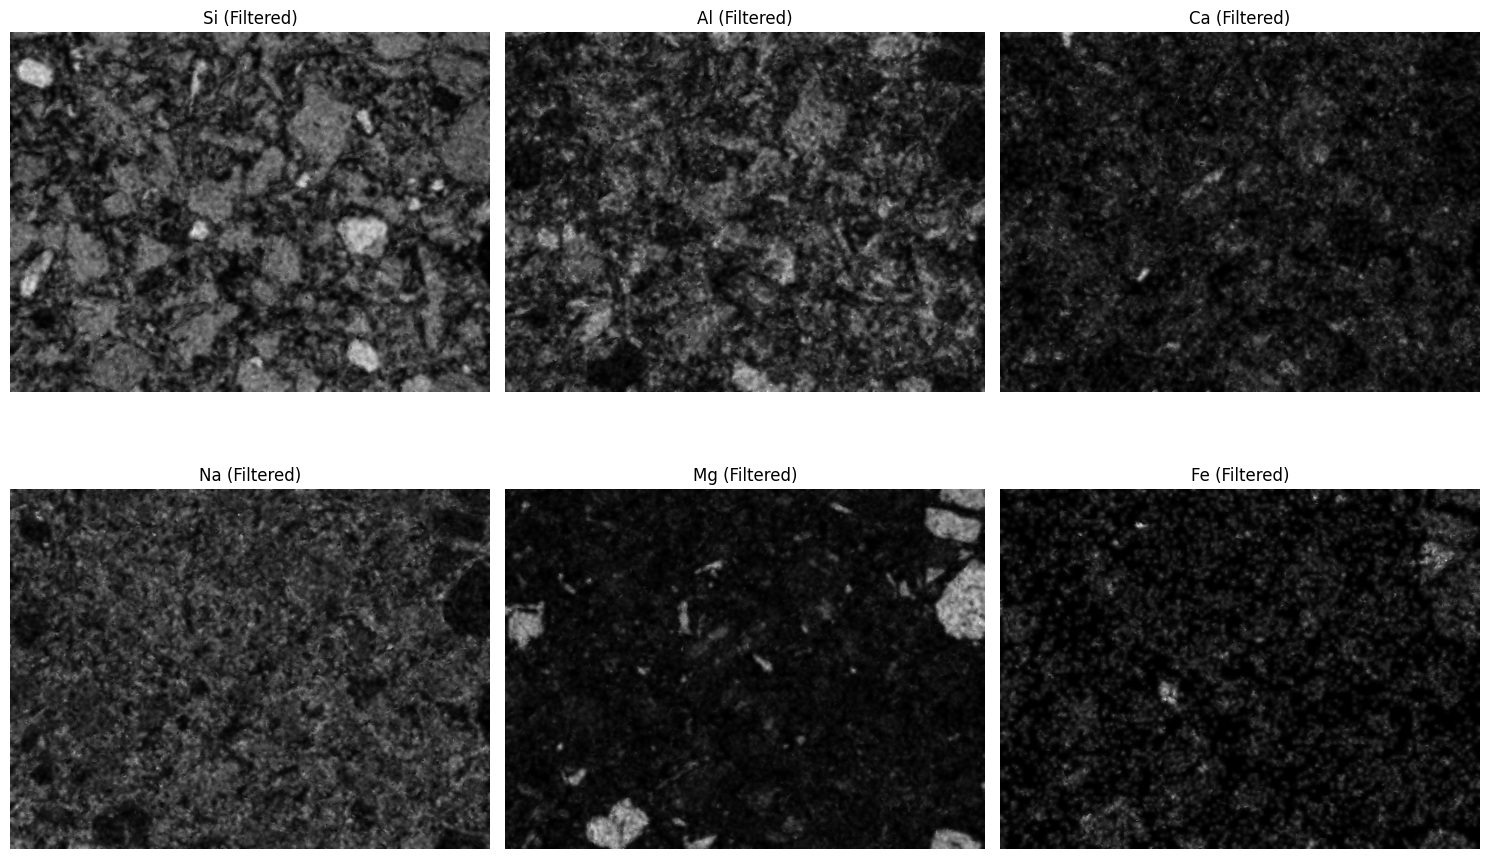

In [8]:
import cv2
import numpy as np
import os

# -------------------------- 1. 参数配置 --------------------------
# BSE图像路径
BSE_PATH = "BSE.jpg"

# 元素列表
ELEMENTS = ["Si", "Al", "Ca", "Na", "Mg", "Fe"]

# 滤波参数
RADIUS = 3      # 滤波的局部窗口大小
EPS = 0.1       # 规范化稀疏，控制平滑程度

# 结果保存文件夹
OUTPUT_FOLDER = "filtered_elements"

# -------------------------- 2. 创建输出文件夹 --------------------------
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -------------------------- 3. 读取BSE图像 --------------------------
BSE = cv2.imread(BSE_PATH, 0)
if BSE is None:
    raise FileNotFoundError(f"未找到BSE图像：{BSE_PATH}")

print(f"BSE图像尺寸：{BSE.shape}")

# -------------------------- 4. 批量处理元素面谱 --------------------------
filtered_images = {}  # 存储处理后的图像

for element in ELEMENTS:
    # 构建输入文件路径
    input_path = f"{element}.jpg"
    
    # 读取元素面谱图像
    element_mapping = cv2.imread(input_path, 0)
    
    if element_mapping is None:
        print(f"警告：未找到元素 {element} 的图像文件：{input_path}")
        continue
    
    # 引导滤波降噪
    filtered_element = cv2.ximgproc.guidedFilter(
        guide=BSE,
        src=element_mapping,
        radius=RADIUS,
        eps=EPS,
        dDepth=-1
    )
    
    # 保存滤波后的图像
    output_path = os.path.join(OUTPUT_FOLDER, f"{element}_Filter.jpg")
    cv2.imwrite(output_path, filtered_element)
    
    # 存储到字典中（可选，用于后续处理）
    filtered_images[element] = filtered_element
    
    print(f"✓ {element} 元素面谱降噪完成，保存至：{output_path}")

print(f"\n所有元素面谱降噪处理完成！结果保存在文件夹：{OUTPUT_FOLDER}")

# -------------------------- 5. 可选：显示处理结果 --------------------------
import matplotlib.pyplot as plt

if len(filtered_images) > 0:
    # 计算显示布局
    n_elements = len(filtered_images)
    cols = 3
    rows = (n_elements + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if n_elements == 1:
        axes = [axes]
    elif rows == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, (element, img) in enumerate(filtered_images.items()):
        if i < len(axes):
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f'{element} (Filtered)')
            axes[i].axis('off')
    
    # 隐藏多余的子图
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


In [4]:
pip install opencv-python opencv-contrib-python scikit-image numpy

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 13.9 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 89.8 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 82.4 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 61.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


✓ Si 元素面谱增强完成，保存至：enhanced_elements/Si_Enhance.jpg
✓ Al 元素面谱增强完成，保存至：enhanced_elements/Al_Enhance.jpg
✓ Ca 元素面谱增强完成，保存至：enhanced_elements/Ca_Enhance.jpg
✓ Na 元素面谱增强完成，保存至：enhanced_elements/Na_Enhance.jpg
✓ Mg 元素面谱增强完成，保存至：enhanced_elements/Mg_Enhance.jpg
✓ Fe 元素面谱增强完成，保存至：enhanced_elements/Fe_Enhance.jpg

所有元素面谱增强处理完成！结果保存在文件夹：enhanced_elements


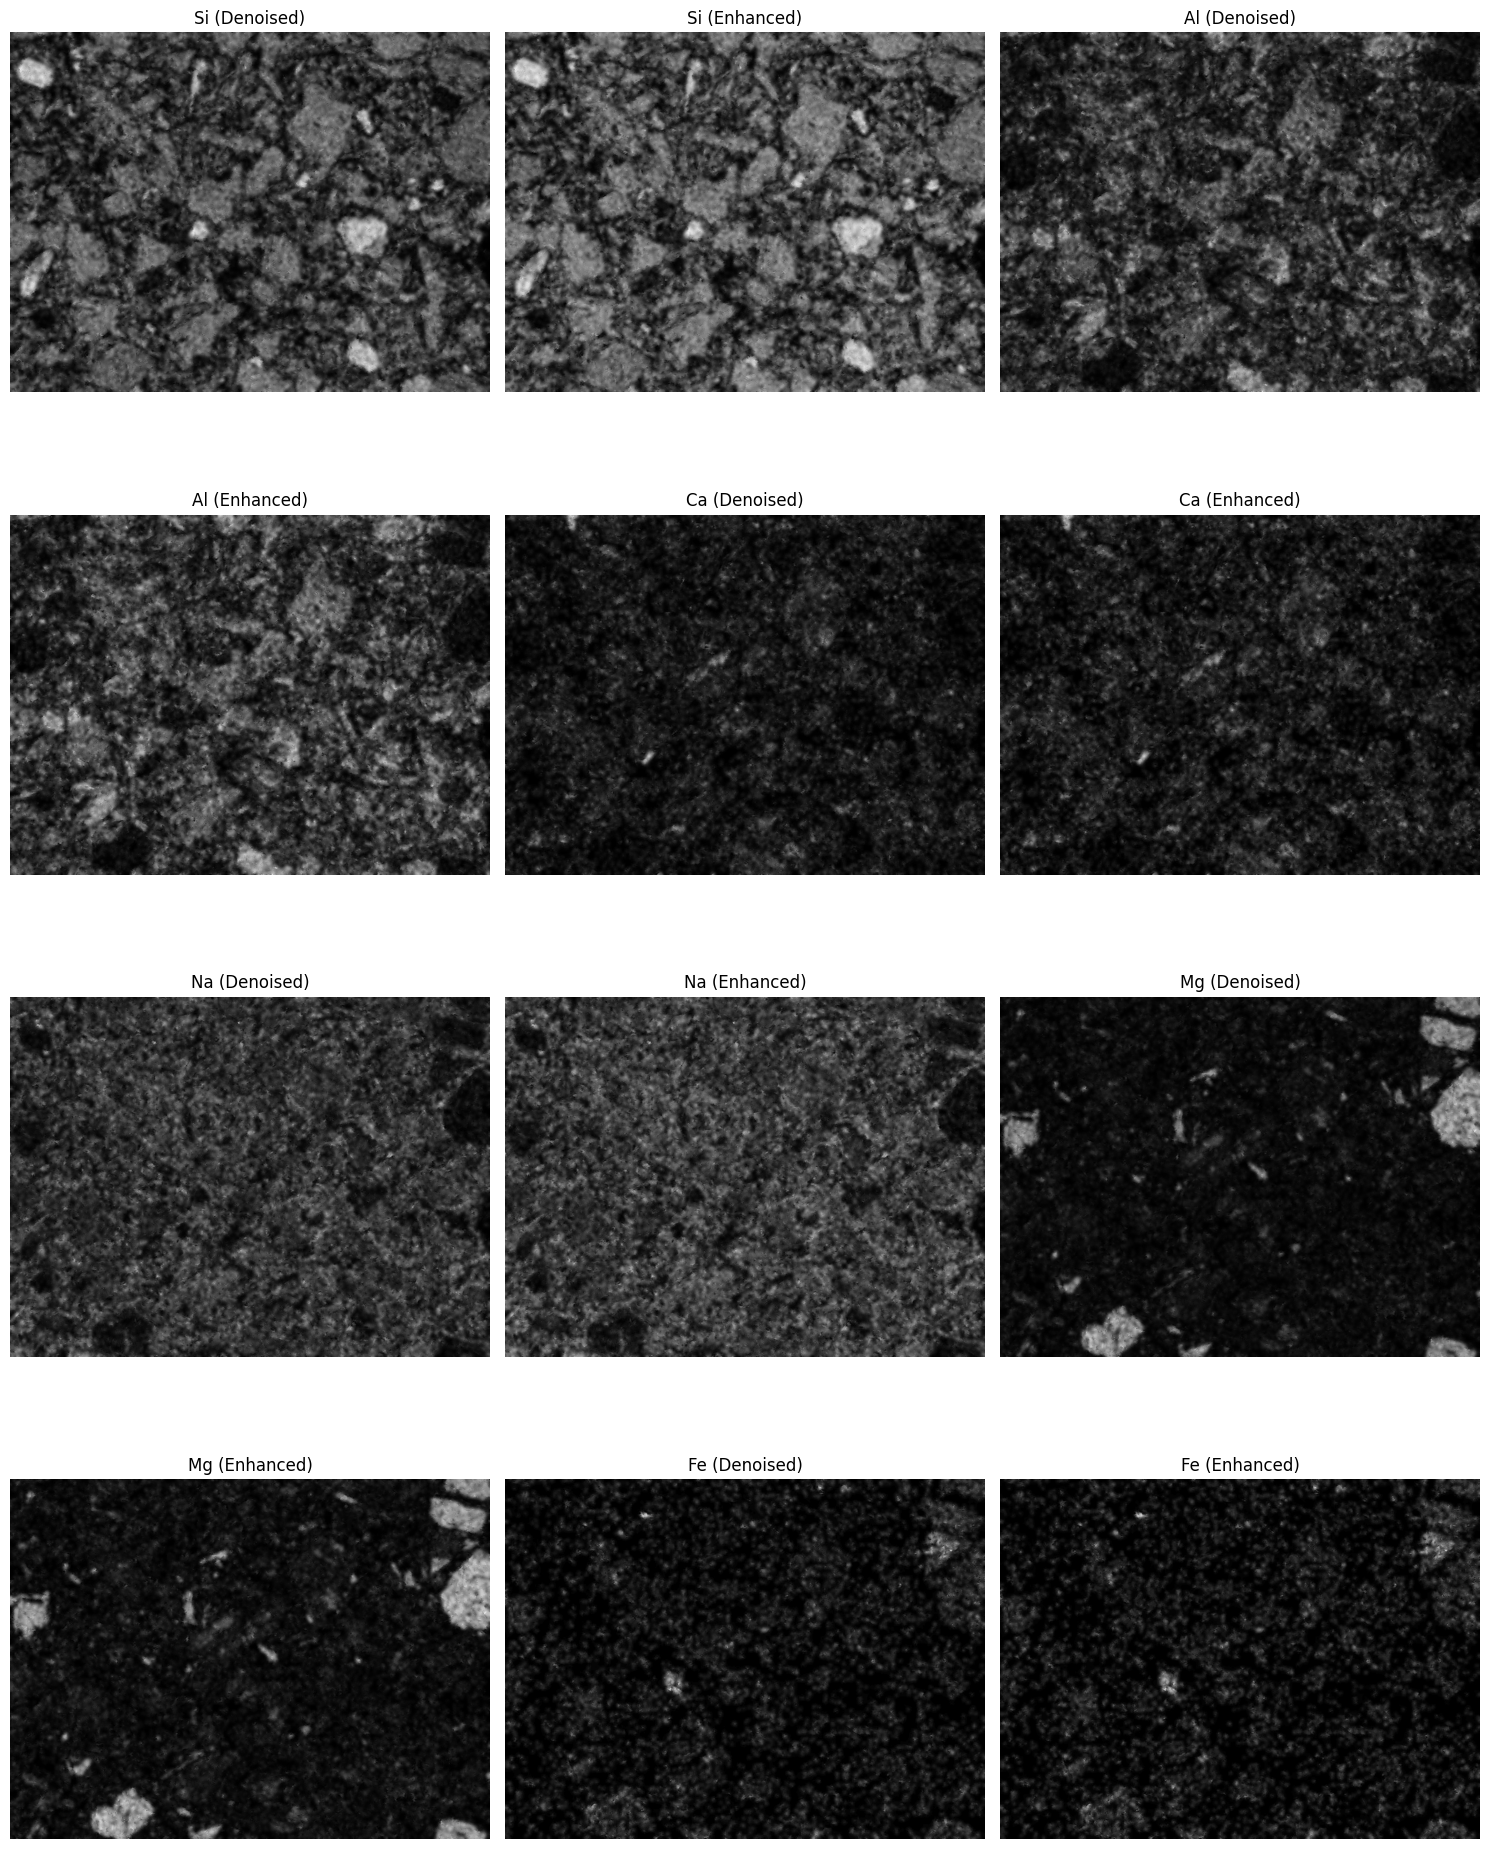

In [9]:
import cv2
import numpy as np 
from skimage import exposure
import os
import matplotlib.pyplot as plt

# -------------------------- 1. 参数配置 --------------------------
# 元素列表
ELEMENTS = ["Si", "Al", "Ca", "Na", "Mg", "Fe"]

# 增强参数
GAIN = 1.0  # 对数校正增益值，可根据需要调整

# 输入文件夹（降噪后的图像）
INPUT_FOLDER = "filtered_elements"

# 结果保存文件夹
OUTPUT_FOLDER = "enhanced_elements"

# -------------------------- 2. 创建输出文件夹 --------------------------
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -------------------------- 3. 批量处理元素面谱增强 --------------------------
enhanced_images = {}  # 存储处理后的图像

for element in ELEMENTS:
    # 构建输入文件路径
    input_path = os.path.join(INPUT_FOLDER, f"{element}_Filter.jpg")
    
    # 读取降噪后的元素面谱图像
    denoised_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    
    if denoised_image is None:
        print(f"警告：未找到元素 {element} 的降噪图像：{input_path}")
        continue
    
    # 利用对数校正进行增强处理
    enhanced_image = exposure.adjust_log(denoised_image, GAIN)
    
    # 将增强后的图像转换为适合保存的uint8格式
    enhanced_image_uint8 = cv2.normalize(
        enhanced_image, 
        None, 
        0, 255, 
        cv2.NORM_MINMAX, 
        dtype=cv2.CV_8U
    )
    
    # 保存增强后的图像
    output_path = os.path.join(OUTPUT_FOLDER, f"{element}_Enhance.jpg")
    cv2.imwrite(output_path, enhanced_image_uint8)
    
    # 存储到字典中（可选，用于后续处理）
    enhanced_images[element] = {
        'original': denoised_image,
        'enhanced': enhanced_image_uint8
    }
    
    print(f"✓ {element} 元素面谱增强完成，保存至：{output_path}")

print(f"\n所有元素面谱增强处理完成！结果保存在文件夹：{OUTPUT_FOLDER}")

# -------------------------- 4. 可选：显示处理结果对比 --------------------------
if len(enhanced_images) > 0:
    # 计算显示布局
    n_elements = len(enhanced_images)
    cols = 3
    rows = (n_elements + cols - 1) // cols * 2  # 每个元素显示原图和增强图，所以行数*2
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1:
        axes = [axes] if cols == 1 else axes
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    else:
        axes = axes.flatten()
    
    plot_idx = 0
    for element, images in enhanced_images.items():
        # 显示原图（降噪后）
        if plot_idx < len(axes):
            axes[plot_idx].imshow(images['original'], cmap='gray')
            axes[plot_idx].set_title(f'{element} (Denoised)')
            axes[plot_idx].axis('off')
            plot_idx += 1
        
        # 显示增强后图像
        if plot_idx < len(axes):
            axes[plot_idx].imshow(images['enhanced'], cmap='gray')
            axes[plot_idx].set_title(f'{element} (Enhanced)')
            axes[plot_idx].axis('off')
            plot_idx += 1
    
    # 隐藏多余的子图
    for j in range(plot_idx, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
